In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\DATA\heart_disease_dataset.csv")

We have imported the data from the link provided by Ineuron

In [19]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Presence
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Presence
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Presence
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Presence


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  num            303 non-null    int64  
 14  Heart_Disease  303 non-null    object 
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [21]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'Heart_Disease'],
      dtype='object')

There are thirteen features in Dataset
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)

In [22]:
data.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
num              0
Heart_Disease    0
dtype: int64

In [23]:
data['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

In [24]:
data.shape

(303, 15)

Classified the data presnt in 'num' column and added in a new column 'Heart disease' using apply()


In [28]:
def heart_disease(row):
    if row == 0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [29]:
data['Heart_Disease'] = data['num'].apply(heart_disease)

In [30]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence


In [31]:
hd = data.groupby('Heart_Disease')['num'].size()

In [32]:
hd

Heart_Disease
Absence     164
Presence    139
Name: num, dtype: int64

In [33]:
data['thal'].value_counts()

 3         166
 7         117
 6          18
-100000      2
Name: thal, dtype: int64

columns 'thal'and 'ca' have few outliers

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal'>

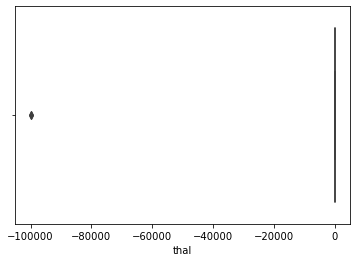

In [35]:
sns.boxplot(data['thal'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca'>

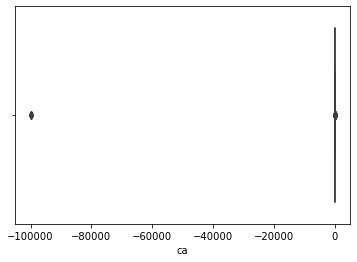

In [36]:
sns.boxplot(data['ca'])

In [37]:
data['ca'].value_counts()

 0         176
 1          65
 2          38
 3          20
-100000      4
Name: ca, dtype: int64

In [38]:
data[data['ca']==-100000]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
166,52,1,3,138,223,0,0,169,0,0.0,1,-100000,3,0,Absence
192,43,1,4,132,247,1,2,143,1,0.1,2,-100000,7,1,Presence
287,58,1,2,125,220,0,0,144,0,0.4,2,-100000,7,0,Absence
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0,Absence


In [39]:
data[data['thal']==-100000]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
87,53,0,3,128,216,0,2,115,0,0.0,1,0,-100000,0,Absence
266,52,1,4,128,204,1,0,156,1,1.0,2,0,-100000,1,Presence


In [40]:
data['thal'].replace(-100000,3,inplace=True)

In [41]:
data['ca'].replace(-100000,0,inplace=True)

In [43]:
data['ca'].value_counts() #we have successfully replaced those outliers with Mode value

0    180
1     65
2     38
3     20
Name: ca, dtype: int64

In [46]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

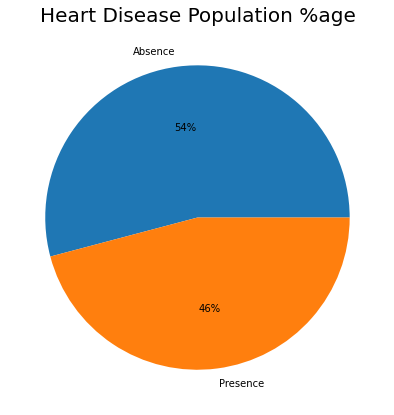

In [47]:
plt.figure(figsize=(10,7))
plt.pie(hd,labels=['Absence','Presence'],autopct='%0.0f%%')
plt.title("Heart Disease Population %age",fontsize=20)
plt.show()

From the overall population, people having heart disease (46%) are lesser than those who doesn't have heart disease(56%)

In [48]:
data['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76], dtype=int64)

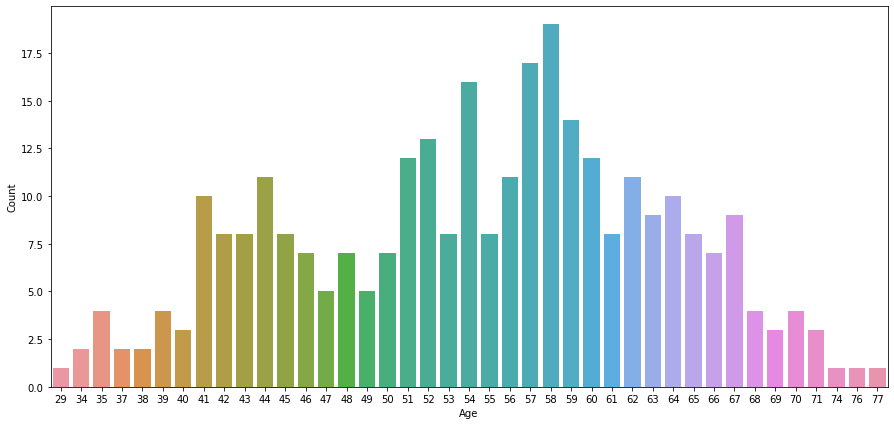

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',data=data)
plt.xlabel(xlabel='Age')
plt.ylabel(ylabel='Count')
plt.show()

In [52]:
#Stats

In [53]:
Min_age = data['age'].min()
Max_age = data['age'].max()
Mean_age = data['age'].mean()
print("Minimum age is: {0}\nMaximum age is: {1}\nMean of Age is: {2}".format(Min_age,Max_age,Mean_age))

Minimum age is: 29
Maximum age is: 77
Mean of Age is: 54.43894389438944


In [54]:
#Categorical Analysis

In [55]:
Young_age = data[(data['age']>=29) & (data['age']<40)]

In [56]:
Mid_age = data[(data['age']>=40) & (data['age'] <55)]

In [57]:
Old_age = data[(data['age']>=55)]

In [58]:
print("Number of Young age people are: {0}\nNumber of Middly age people are: {1}\nNumber of Elder age People are: {2}".format(len(Young_age),len(Mid_age),len(Old_age)))

Number of Young age people are: 15
Number of Middly age people are: 128
Number of Elder age People are: 160


In [59]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

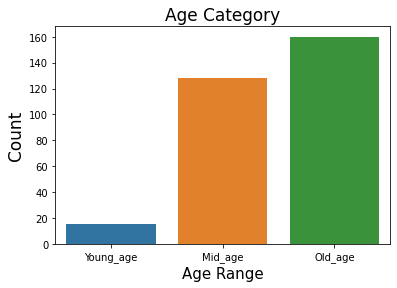

In [60]:
sns.barplot(x=['Young_age','Mid_age','Old_age'],y=[len(Young_age),len(Mid_age),len(Old_age)])
plt.title('Age Category',fontsize=17)
plt.xlabel(xlabel='Age Range',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=17)
plt.show()

In [61]:
#Converting Numerical Data into Categorical Data

In [62]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Presence
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Presence
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Presence
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Presence


Here we have classified the sex column and added Sex1 column as male and female

In [66]:
def Sex(row):
    if (row==1):
        return 'Male'
    elif (row==0):
        return 'Female'

In [67]:
data['Sex1']=data['sex'].apply(Sex)

In [68]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female


Here we have categorized the age with 3 different categories and also added as a new column

In [72]:
def Age_range(row):
    if (row>=29 and row <40):
        return 'Young age'
    elif(row >=40 and row <55):
        return 'Mid age'
    elif (row >= 55 and row <78):
        return 'Old age'

In [73]:
data['Age_range']=data['age'].apply(Age_range)

In [74]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Sex1,Age_range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Old age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male,Old age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Old age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Mid age


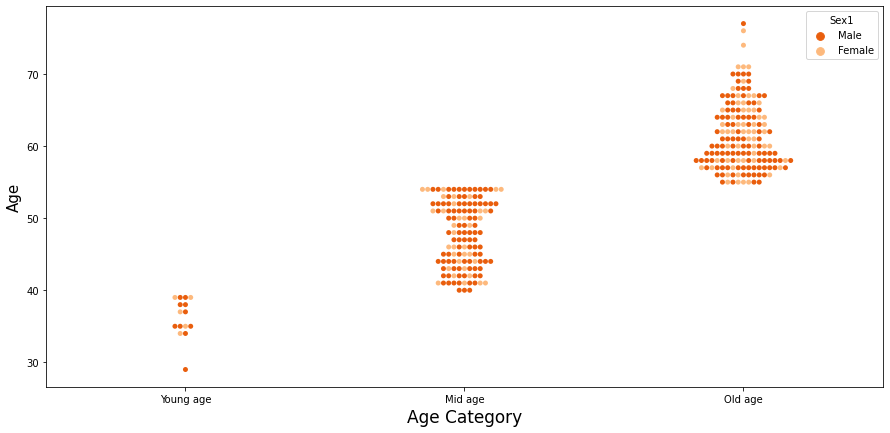

In [75]:
plt.figure(figsize=(15,7))
sns.swarmplot(x='Age_range',y='age',hue='Sex1',data=data,order=['Young age','Mid age','Old age'],palette='Oranges_r')
plt.xlabel('Age Category',fontsize=17)
plt.ylabel('Age',fontsize=15)
plt.show()

In Our Population Number Of Males are more in Middle Age Category and Females are more in Elder Age Category

In [76]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Sex1,Age_range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Old age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male,Old age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Old age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Mid age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Presence,Male,Mid age
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Presence,Male,Old age
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Presence,Male,Old age
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Presence,Female,Old age


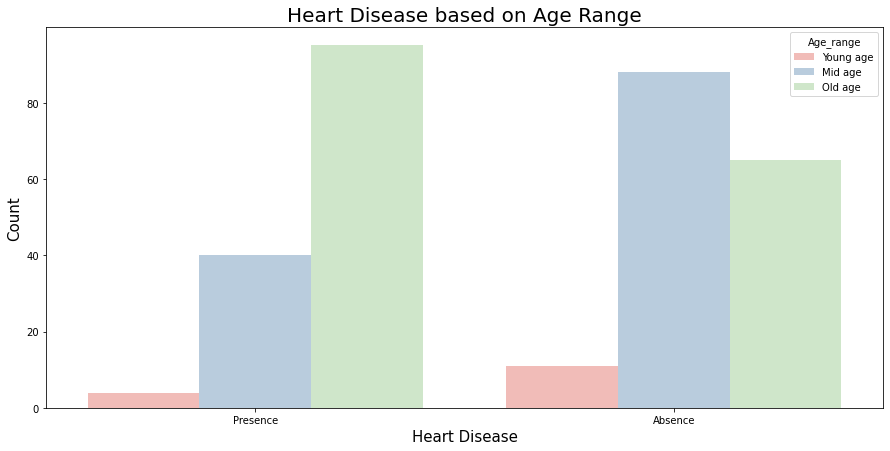

In [77]:
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue='Age_range',data=data,order=['Presence','Absence'],hue_order=['Young age','Mid age','Old age'],palette='Pastel1')
plt.title("Heart Disease based on Age Range",fontsize=20)
plt.xlabel(xlabel='Heart Disease',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=15)
plt.show()

Old people are more affected by Heart Disease compared to other ages and middle aged people are more free from Head Disease compared to other ages

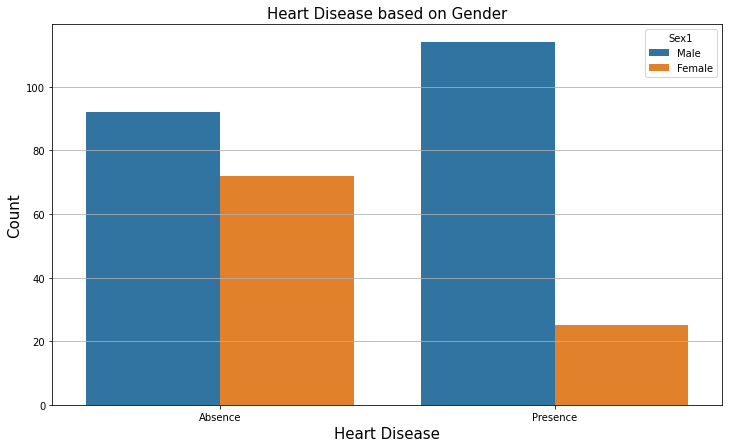

In [78]:
plt.figure(figsize=(12,7))
plt.grid()
sns.countplot(x='Heart_Disease',hue='Sex1',data=data,order=['Absence','Presence'])
plt.xlabel(xlabel='Heart Disease',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=15)
plt.title("Heart Disease based on Gender",fontsize=15)
plt.show()

Heart Disease is comparatively higher in Males than the Females

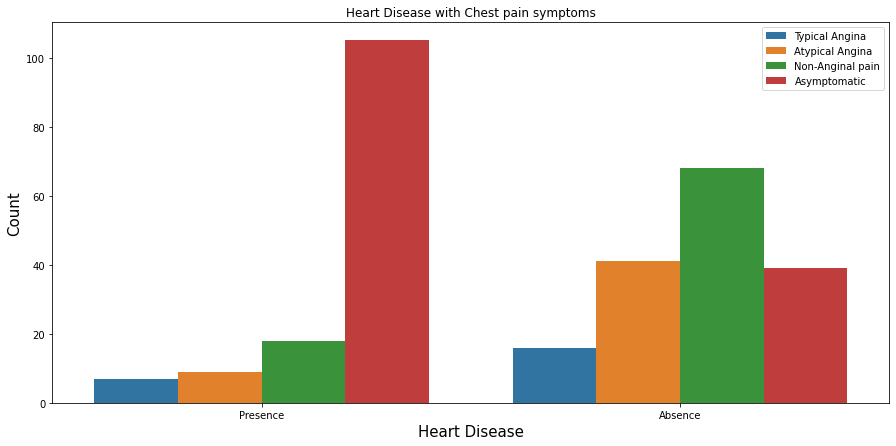

In [79]:
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue='cp',order=['Presence','Absence'],data=data)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'],fontsize=10)
plt.xlabel(xlabel='Heart Disease',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=15)
plt.title('Heart Disease with Chest pain symptoms')
plt.show()

It is very interesting to see that Asymptomatic chest pain patients are more affected by Heart Disease even than other chest pain patients

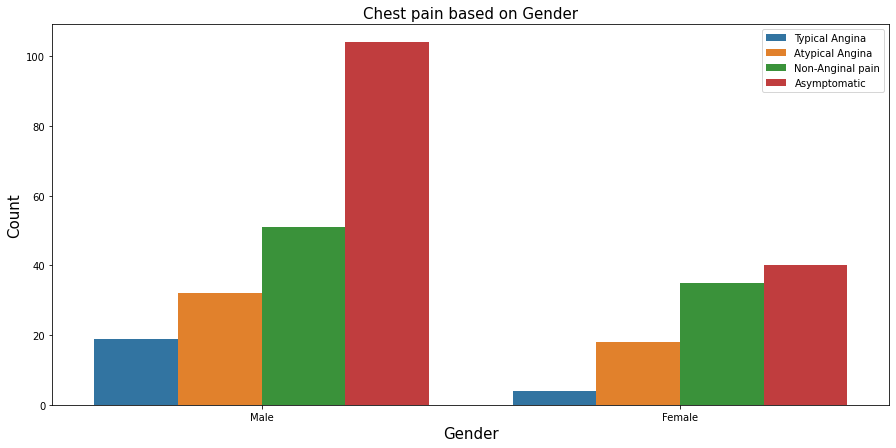

In [80]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex1',hue='cp',data=data)
plt.title("Chest pain based on Gender",fontsize=15)
plt.xlabel(xlabel='Gender',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

We can see that a higher number of men are suffering from Asymptomatic type of Chest Pain

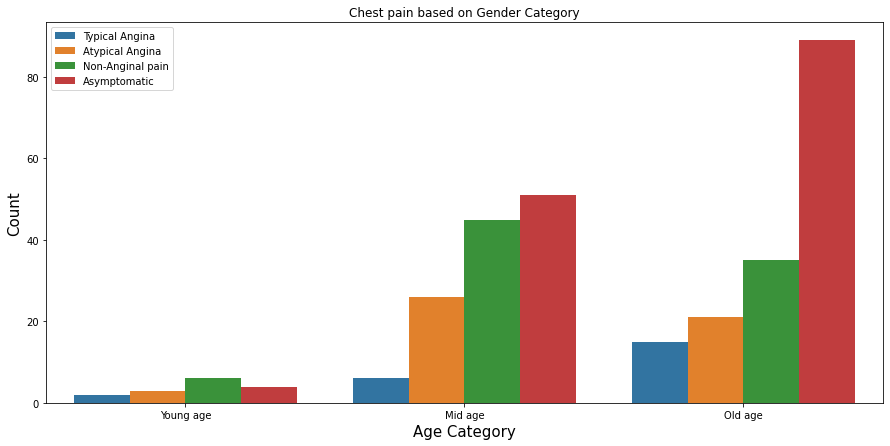

In [81]:
plt.figure(figsize=(15,7),frameon=True)
sns.countplot(x='Age_range',hue='cp',data=data,order=['Young age','Mid age','Old age'])
plt.xlabel(xlabel='Age Category',fontsize=15)
plt.ylabel(ylabel='Count',fontsize=15)
plt.title("Chest pain based on Gender Category")
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

In young age non-anginal pain is more where in Mid and old age asymptomatic chest pain is more

In [82]:
data['trestbps']

0      145
1      160
2      120
3      130
4      130
      ... 
298    110
299    144
300    130
301    130
302    138
Name: trestbps, Length: 303, dtype: int64

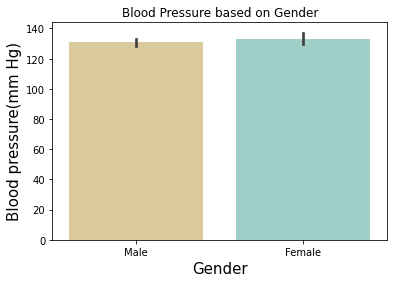

In [83]:
plt.figure()
sns.barplot(x='Sex1',y='trestbps',data=data,palette='BrBG')
plt.title("Blood Pressure based on Gender")
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Blood pressure(mm Hg)",fontsize=15)
plt.show()

Both the Genders have nearly equal Blood pressure.

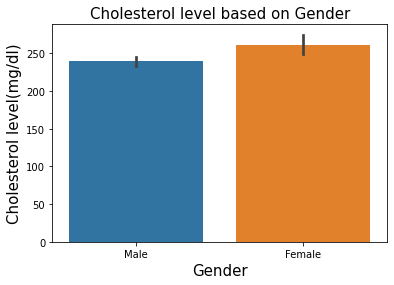

In [84]:
plt.figure()
sns.barplot(x='Sex1',y='chol',data=data)
plt.xlabel(xlabel='Gender',fontsize=15)
plt.ylabel(ylabel='Cholesterol level(mg/dl)',fontsize=15)
plt.title("Cholesterol level based on Gender",fontsize=15)
plt.show()

In [85]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Sex1,Age_range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Old age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male,Old age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Old age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Mid age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Presence,Male,Mid age
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Presence,Male,Old age
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Presence,Male,Old age
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Presence,Female,Old age


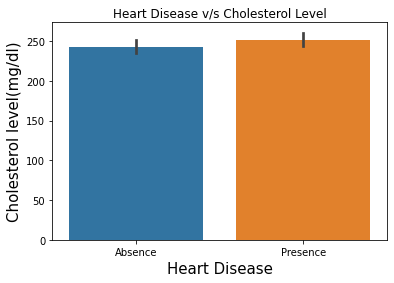

In [86]:
plt.figure()
sns.barplot(x='Heart_Disease',y='chol',data=data)
plt.xlabel(xlabel='Heart Disease',fontsize=15)
plt.ylabel(ylabel='Cholesterol level(mg/dl)',fontsize=15)
plt.title("Heart Disease v/s Cholesterol Level")
plt.show()

In [87]:
#More Cholesterol means More chance of Heart Disease

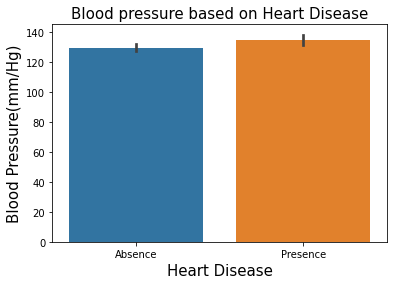

In [88]:
plt.figure()
sns.barplot(x='Heart_Disease',y='trestbps',data=data)
plt.xlabel(xlabel='Heart Disease',fontsize=15)
plt.ylabel(ylabel='Blood Pressure(mm/Hg)',fontsize=15)
plt.title("Blood pressure based on Heart Disease",fontsize=15)
plt.show()

Blood pressure is more in Heart Patients.

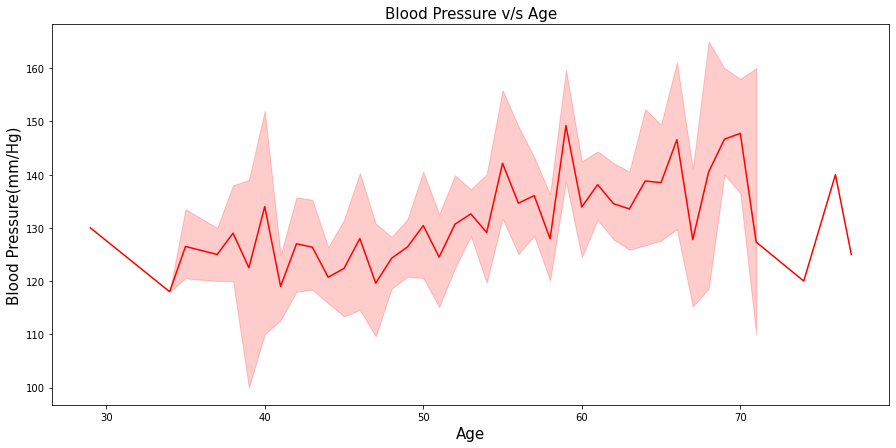

In [89]:
plt.figure(figsize=(15,7))
sns.lineplot(x='age',y='trestbps',data=data,color='r')
plt.xlabel(xlabel='Age',fontsize=15)
plt.ylabel(ylabel='Blood Pressure(mm/Hg)',fontsize=15)
plt.title("Blood Pressure v/s Age",fontsize=15)
plt.show()

Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

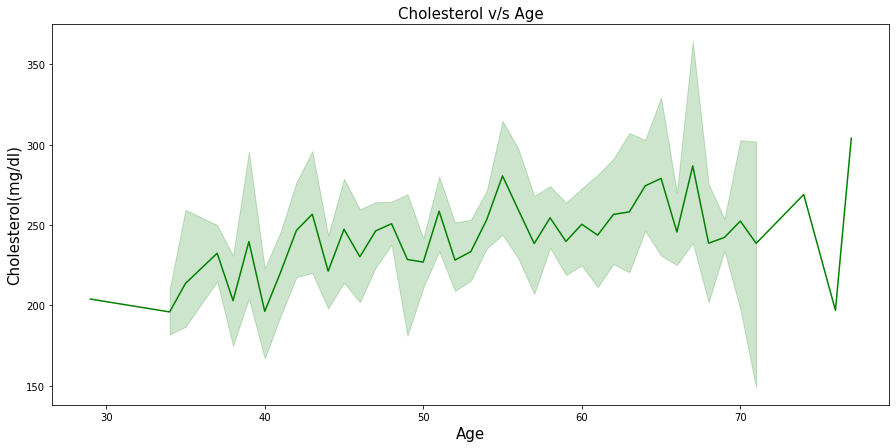

In [90]:
plt.figure(figsize=(15,7))
sns.lineplot(x='age',y='chol',data=data,color='g')
plt.xlabel(xlabel='Age',fontsize=15)
plt.ylabel(ylabel='Cholesterol(mg/dl)',fontsize=15)
plt.title('Cholesterol v/s Age',fontsize=15)
plt.show()

Cholesterol Increases slightly at the age of 45-60

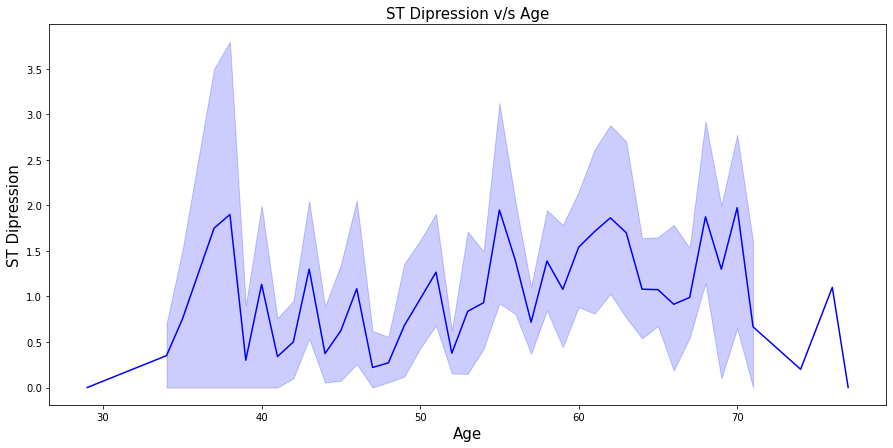

In [91]:
plt.figure(figsize=(15,7))
sns.lineplot(x='age',y='oldpeak',data=data,color='b')
plt.xlabel(xlabel='Age',fontsize=15)
plt.ylabel(ylabel='ST Dipression',fontsize=15)
plt.title('ST Dipression v/s Age',fontsize=15)
plt.show()

ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

We can see that ST dipression increases at the age of 30-40 then again on 55-60

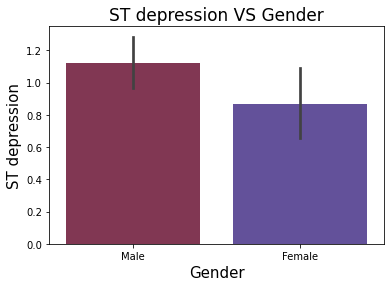

In [92]:
sns.barplot(x='Sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Gender', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

In [93]:
#Males are more prone to ST dipression

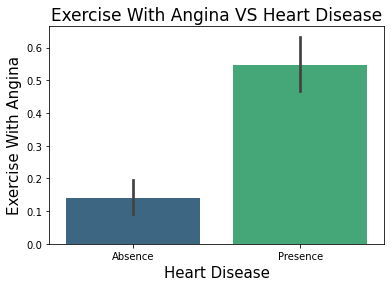

In [94]:
sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

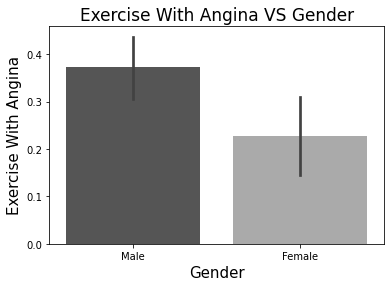

In [95]:
sns.barplot(x='Sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

Males have have high Exercise Angina

Angina is a type of chest pain caused by reduced blood flow to the heart.

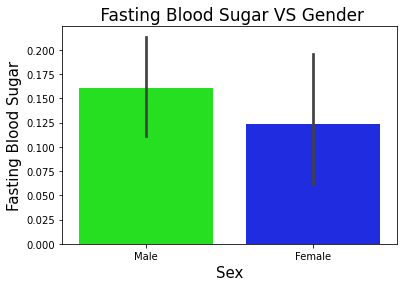

In [101]:
sns.barplot(y='fbs', x='Sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

Males have high no of Fasting Blood Sugar over 120

<AxesSubplot:>

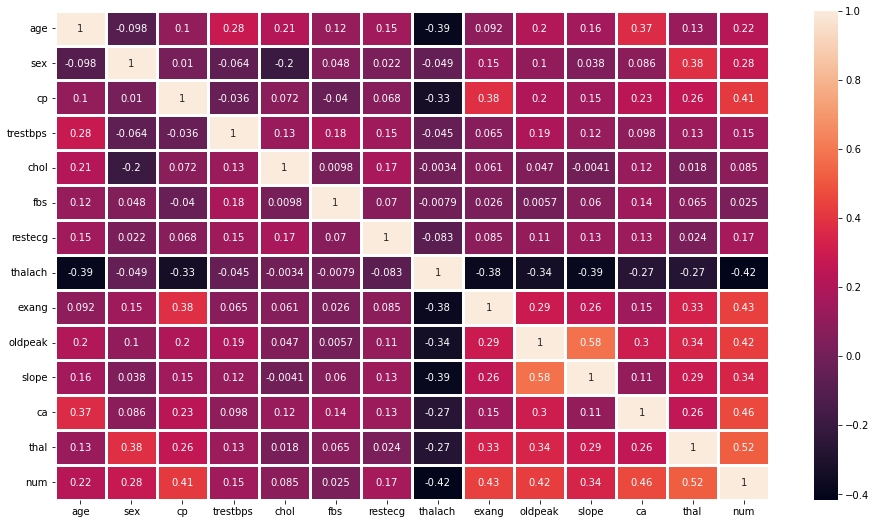

In [102]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)

In [103]:
data.to_csv("My Heart disease.csv",index=False)

dataframe converted into a csv file and loaded inm powerBI tool for further visualization and make a report on Heart disease